<a href="https://colab.research.google.com/github/JasLieb/IML/blob/master/TP3/regression_immobilier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
tr = pd.read_csv('train.csv')

In [0]:
tr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [0]:
x = tr['GrLivArea']
x

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [0]:
y = tr['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

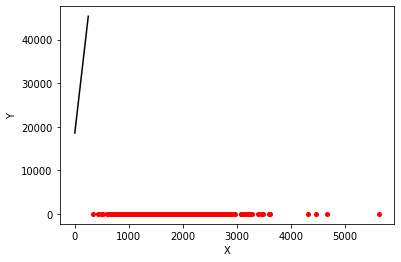

matrix([[18569.02585649],
        [  107.13035897]])

In [0]:
# Soit theta = (Xt . X)^(-1) . Xt . Y
X = np.matrix([np.ones(x.shape[0]), x]).T
Y = np.matrix(y.values).T

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
X = np.array(train['GrLivArea']) # The design matrix - a (N,D) matrix where rows are data points [here D=1]
N = X.shape[0] 
D = 1
X = np.reshape(X,(N,D)) #Keep it as a matrix, though here it is just a vector since D=1

### Extract the sale-price from the dataframe
y = np.array(train['SalePrice'])
y = np.reshape(y,(N,1))
y = np.log(y) # take the log of the sale price as our target; see "Bayesian decision theory" below

### Now create the design matrix for the test data. It is important that it is structured in the same
###        way as our training data matrix. This is no issue with only one feature...
X_test = np.array(test['GrLivArea'])
N_test = X_test.shape[0]
X_test = np.reshape(X_test,(N_test,D))
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y, 'ro', markersize=4)

plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='-', c='#000000')
plt.show()


theta

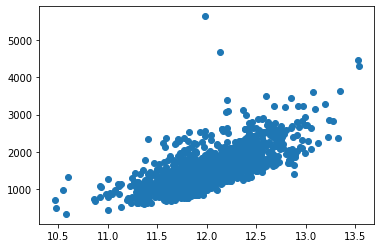

In [0]:
plt.scatter(y, x)

In [0]:
print(x.shape)
print(y.shape)

(1460,)
(1460, 1)


In [0]:
x = x.values.reshape(x.shape[0], 1)


In [0]:
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))
print(X.shape)
print(X[:10])

(1460, 3)
[[2.924100e+06 1.710000e+03 1.000000e+00]
 [1.592644e+06 1.262000e+03 1.000000e+00]
 [3.189796e+06 1.786000e+03 1.000000e+00]
 [2.948089e+06 1.717000e+03 1.000000e+00]
 [4.831204e+06 2.198000e+03 1.000000e+00]
 [1.855044e+06 1.362000e+03 1.000000e+00]
 [2.869636e+06 1.694000e+03 1.000000e+00]
 [4.368100e+06 2.090000e+03 1.000000e+00]
 [3.147076e+06 1.774000e+03 1.000000e+00]
 [1.159929e+06 1.077000e+03 1.000000e+00]]


In [0]:
theta = np.random.randn(3, 1)
theta

array([[ 0.29393702],
       [-0.06981908],
       [ 0.9514271 ]])

In [0]:
def model(X, theta):
    return X.dot(theta)

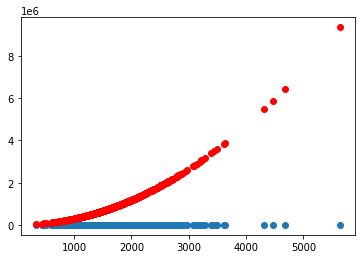

In [0]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

In [0]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [0]:
cost_function(X, y, theta)

469728356049.34265

In [0]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [0]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [0]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


In [0]:
theta_final

array([[nan],
       [nan],
       [nan]])

In [0]:
path_to_training_data = 'train.csv' #This syntax says to go up a level (../) then down into input
path_to_test_data = 'test.csv'

train = pd.read_csv(path_to_training_data) # This is the training data
test = pd.read_csv(path_to_test_data) # this loads the test data


In [0]:
X = np.array(train['GrLivArea']) # The design matrix - a (N,D) matrix where rows are data points [here D=1]
N = X.shape[0] 
D = 1
X = np.reshape(X,(N,D)) #Keep it as a matrix, though here it is just a vector since D=1

### Extract the sale-price from the dataframe
y = np.array(train['SalePrice'])
y = np.reshape(y,(N,1))
y = np.log(y) # take the log of the sale price as our target; see "Bayesian decision theory" below

### Now create the design matrix for the test data. It is important that it is structured in the same
###        way as our training data matrix. This is no issue with only one feature...
X_test = np.array(test['GrLivArea'])
N_test = X_test.shape[0]
X_test = np.reshape(X_test,(N_test,D))

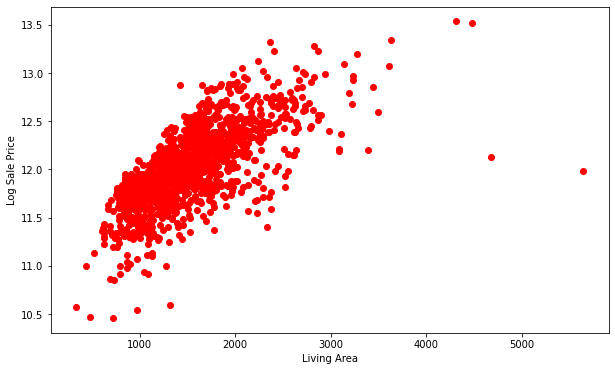

In [0]:
fig1 = plt.figure(figsize=(10,6)) # create the figure object
plt.plot(X,y,'ro') # plot the X data versus y data in red circles
plt.xlabel('Living Area') # label x-axis
plt.ylabel('Log Sale Price') # label y-axis
plt.show()


In [0]:
def residual_sum_of_squares(y_predictions,y_values):
    """ This function calculates the residual sum of squares. 
        A residual is the true y value minus the predicted value.
        Squaring the residuals and adding them up gives the RSS
    """
    residuals = y_values - y_predictions # make the vector of residuals via elementwise subtraction
    residuals_squared = residuals**2 # elementwise squaring
    RSS = np.sum(residuals_squared)
    
    return RSS

def root_mean_square_error(y_predictions,y_values):
    """ This function calculates the RSME. 
        This is given by taking the root of the RSS divided by the number of data points
    """
    
    N = len(y_values) # The number of data points
    RSS = residual_sum_of_squares(y_predictions,y_values) # see above
    MSE = RSS/N # The mean squared error
    RMSE = np.sqrt(MSE)
    
    return RMSE

In [0]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression() # This will find the weights that minimise the RSS
ls_solution= linear_regression.fit(X,y) # ls stands for "least-squares" i.e. it minimises the RSS
y_predictions = ls_solution.predict(X) # this calculates the y-predictions
RMSE = root_mean_square_error(y_predictions,y)


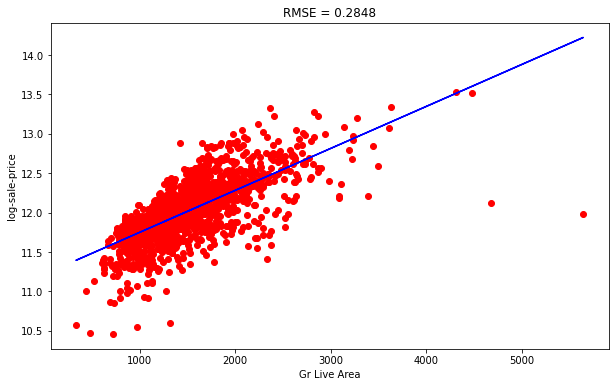

In [0]:
plt.figure(figsize=(10,6))
plt.plot(X,y,'ro')
plt.plot(X,ls_solution.predict(X),'b-') # blue and red contrast well for the colourblind. Please not green and red.
plt.title('RMSE = {:.4f}'.format(RMSE)) # the format method on a string is useful, it places the given value ...
plt.ylabel('log-sale-price')    # .. into the {}. The :.4f syntax in {} tells it to keep 4 dp.
plt.xlabel('Gr Live Area')
plt.show()